In [1]:
import torch
from PIL import Image
from sam2.sam2_image_predictor import SAM2ImagePredictor


image_path = "C:/Users/shanm/OneDrive/Documents/Projects/billing/dataset/index/WhatsApp Image 2024-11-30 at 18.25.33_5f37f9d7.jpg"

predictor = SAM2ImagePredictor.from_pretrained("facebook/sam2-hiera-tiny")

# load image 
image = Image.open(image_path)
image = image.convert("RGB")


with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
    predictor.set_image(image)
    masks, _, _ = predictor.predict()

C:\Users\shanm\OneDrive\Documents\Projects\sam2\sam2\modeling\sam\transformer.py:23: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()
c:\Users\shanm\miniconda3\envs\billing\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

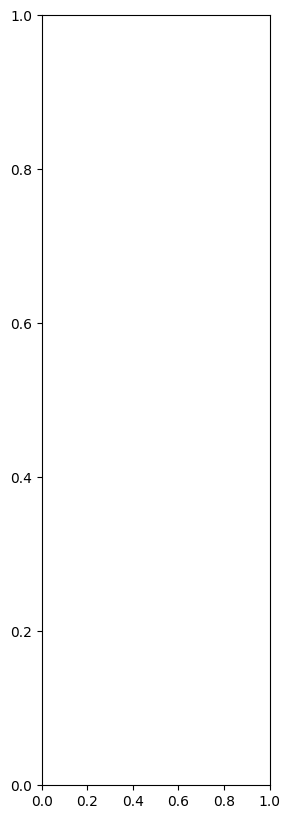

In [2]:
import matplotlib.pyplot as plt

# Visualize the masks
plt.figure(figsize=(10, 10))
for i, mask in enumerate(masks):
    plt.subplot(1, len(masks), i + 1)
    plt.imshow(mask.cpu().numpy(), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')
plt.show()

In [ ]:
from transformers import CLIPProcessor, CLIPModel

def get_segment_mask(image, text_prompt, predictor):
    # Load CLIP model and processor
    clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    # Preprocess the image and text prompt
    inputs = clip_processor(text=text_prompt, images=image, return_tensors="pt", padding=True)

    # Get CLIP embeddings
    with torch.no_grad():
        outputs = clip_model(**inputs)
        image_embeds = outputs.image_embeds
        text_embeds = outputs.text_embeds

    # Set the image and text embeddings in the predictor
    predictor.set_image(image)
    predictor.set_text_embeddings(text_embeds)

    # Predict the mask
    with torch.inference_mode(), torch.autocast("cuda", dtype=torch.bfloat16):
        masks, _, _ = predictor.predict()

    return masks

# Example usage
text_prompt = "a cat"
masks = get_segment_mask(image, text_prompt, predictor)

# Visualize the masks
plt.figure(figsize=(10, 10))
for i, mask in enumerate(masks):
    plt.subplot(1, len(masks), i + 1)
    plt.imshow(mask.cpu().numpy(), cmap='gray')
    plt.title(f'Mask {i+1}')
    plt.axis('off')
plt.show()